<a href="https://colab.research.google.com/github/adryanshinta/Skripsi/blob/main/model_lexicon_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelling

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#import dataset
df = pd.read_csv("/content/sp_label_fix.csv")
df.head()

,Ulasan,Compound_Score,Sentiments
0,"Shopee cheats on collecting coins, the expiry ...",-0.4215,Negatif
1,It's new like a thrift store,0.3612,Positif
2,"Cheap prices for goods, no free shipping, cod,...",-0.7337,Negatif
3,send using spx failed order from dec canceled ...,-0.2960,Negatif
4,What's the simple shopping? Shopee Express hel...,0.8126,Positif


Klasifikasi random forest menggunakan compound score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.20,
                                                    random_state=0)

# Menggunakan compound score lexicon-based dari kolom 'Compound_Score'
lexicon_scores_train = df['Compound_Score']

# Pisahkan data menjadi set pelatihan dan pengujian
X_train_lexicon, X_test_lexicon, _, _ = train_test_split(lexicon_scores_train, df['Sentiments'],
                                                        test_size=0.20,
                                                        random_state=0)

# Random Forest Model dengan compound score lexicon-based
rf_model_lexicon = RandomForestClassifier(random_state=0)
rf_model_lexicon.fit(X_train_lexicon.values.reshape(-1, 1), y_train)  # Perlu reshape karena hanya satu fitur

# Melakukan prediksi pada data testing dengan compound score lexicon-based
y_pred_rf_lexicon = rf_model_lexicon.predict(X_test_lexicon.values.reshape(-1, 1))

# Evaluasi model Random Forest dengan compound score lexicon-based
accuracy_rf_lexicon = accuracy_score(y_test, y_pred_rf_lexicon)
precision_rf_lexicon = precision_score(y_test, y_pred_rf_lexicon, average='weighted', labels=pd.unique(y_pred_rf_lexicon))
recall_rf_lexicon = recall_score(y_test, y_pred_rf_lexicon, average='weighted', labels=pd.unique(y_pred_rf_lexicon))
f1_rf_lexicon = f1_score(y_test, y_pred_rf_lexicon, average='weighted', labels=pd.unique(y_pred_rf_lexicon))

# Confusion Matrix
cm_rf_lexicon = confusion_matrix(y_test, y_pred_rf_lexicon)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy with Lexicon-based Score:", accuracy_rf_lexicon)
print("Random Forest Precision with Lexicon-based Score:", precision_rf_lexicon)
print("Random Forest Recall with Lexicon-based Score:", recall_rf_lexicon)
print("Random Forest F1 Score with Lexicon-based Score:", f1_rf_lexicon)

# Confusion Matrix untuk Random Forest dengan compound score lexicon-based
print("Confusion Matrix for Random Forest with Lexicon-based Score:")
print(cm_rf_lexicon)

# Classification Report untuk Random Forest dengan compound score lexicon-based
print('\nClassification Report for Random Forest with Lexicon-based Score:\n', classification_report(y_test, y_pred_rf_lexicon, zero_division=0))


Random Forest Accuracy with Lexicon-based Score: 1.0
Random Forest Precision with Lexicon-based Score: 1.0
Random Forest Recall with Lexicon-based Score: 1.0
Random Forest F1 Score with Lexicon-based Score: 1.0
Confusion Matrix for Random Forest with Lexicon-based Score:
[[255   0   0]
 [  0  13   0]
 [  0   0 332]]

Classification Report for Random Forest with Lexicon-based Score:
               precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00       255
      Netral       1.00      1.00      1.00        13
     Positif       1.00      1.00      1.00       332

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



Visualisasi confusion matrix diatas (compound score)

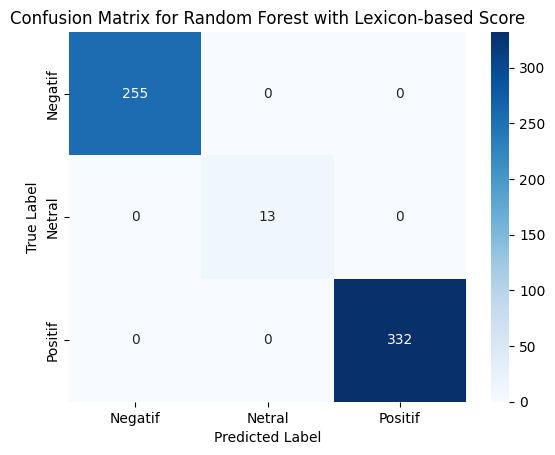

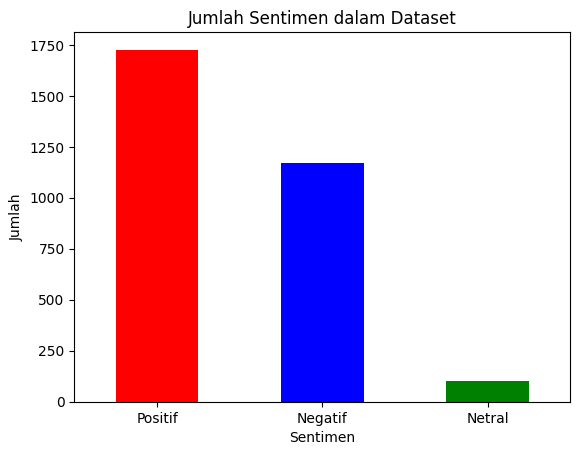

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
sns.heatmap(cm_rf_lexicon, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest with Lexicon-based Score')
plt.show()

# Menampilkan jumlah sentimen dalam diagram
sentiment_counts = df['Sentiments'].value_counts()
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Jumlah Sentimen dalam Dataset')
plt.xticks(rotation=0)
plt.show()


Klasifikasi Rf dengan TF-IDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.20,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', labels=pd.unique(y_pred_rf))
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', labels=pd.unique(y_pred_rf))
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', labels=pd.unique(y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Accuracy: 0.7266666666666667
Random Forest Precision: 0.7364808955950354
Random Forest Recall: 0.7427597955706985
Random Forest F1 Score: 0.7248716067498167
Confusion Matrix for Random Forest:
[[140   0 115]
 [  4   0   9]
 [ 36   0 296]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.78      0.55      0.64       255
      Netral       0.00      0.00      0.00        13
     Positif       0.70      0.89      0.79       332

    accuracy                           0.73       600
   macro avg       0.49      0.48      0.48       600
weighted avg       0.72      0.73      0.71       600



Cross-Validation Scores: [0.74166667 0.7625     0.73125    0.73125    0.73541667]
Average Cross-Validation Score: 0.7404166666666667


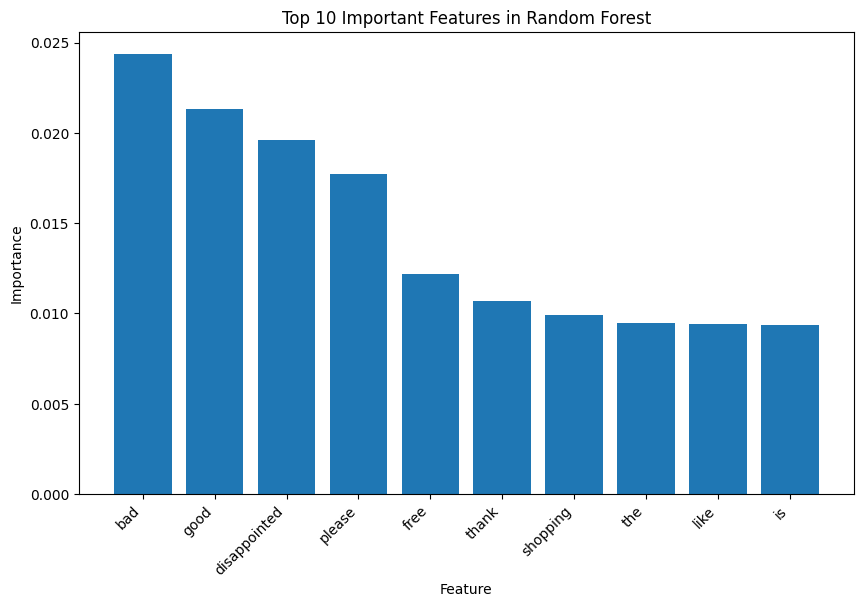

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Cross-Validation
cv_scores = cross_val_score(rf_model, tfidf_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

# Visualisasi Fitur Penting
feature_importances = rf_model.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sorting
indices = feature_importances.argsort()[::-1]
top_features = 10
top_feature_indices = indices[:top_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(top_features), feature_importances[top_feature_indices], align="center")
plt.xticks(range(top_features), [feature_names[i] for i in top_feature_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top {} Important Features in Random Forest".format(top_features))
plt.show()


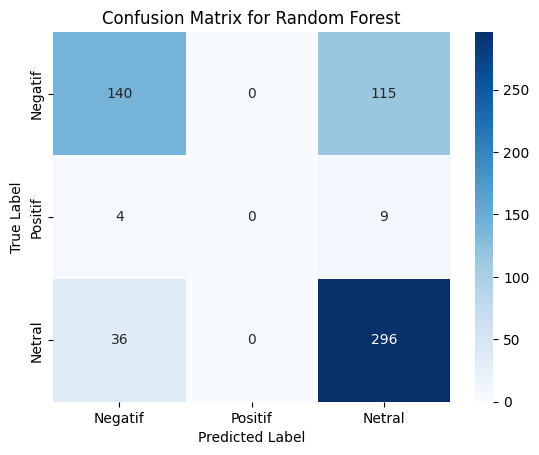

<ipython-input-11-00729b77e1d2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


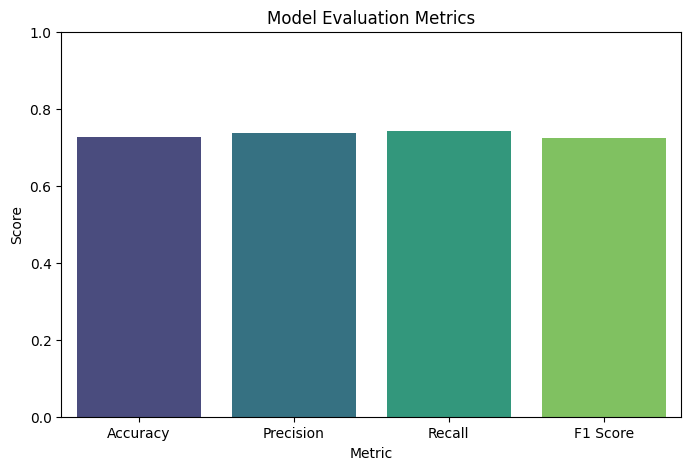

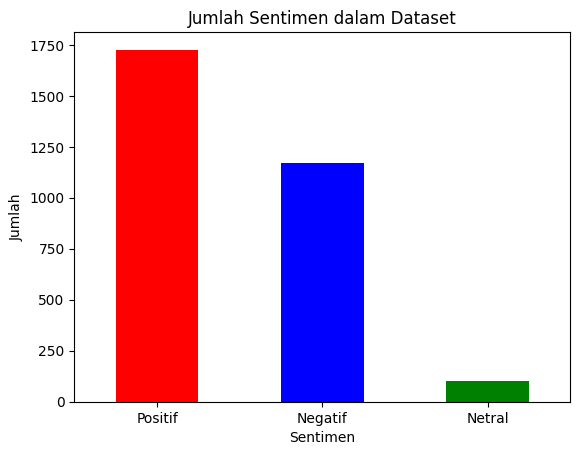

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Akurasi, Presisi, Recall, dan F1 Score
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy_rf, precision_rf, recall_rf, f1_rf]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

# Visualisasi Jumlah Sentimen dalam Diagram
sentiment_counts = df['Sentiments'].value_counts()
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Jumlah Sentimen dalam Dataset')
plt.xticks(rotation=0)
plt.show()
